In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%cd /home/aditya/git/RCNN_Pneumonia

/home/aditya/git/RCNN_Pneumonia


In [25]:
data_dir = '/home/aditya/git/RCNN_Pneumonia/data'

In [47]:
import numpy as np
import os
import random

In [52]:
from model.dataset import PneumoniaDataset
from model.config import PneumoniaConfig
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.utils as utils
from mrcnn.model import log

Using TensorFlow backend.


In [28]:
dataset = PneumoniaDataset(data_dir)
config = PneumoniaConfig()

dataset.prepare()

In [29]:
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 25684
Class Count: 2
  0. BG                                                
  1. Pneumonia                                         


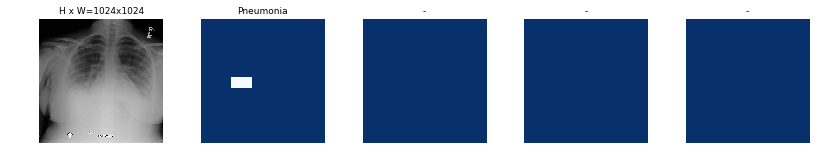

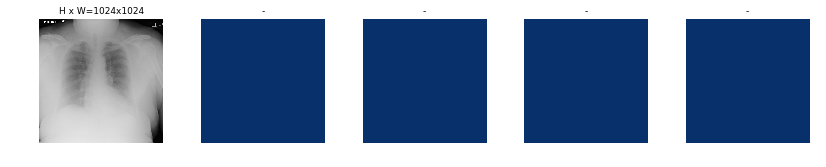

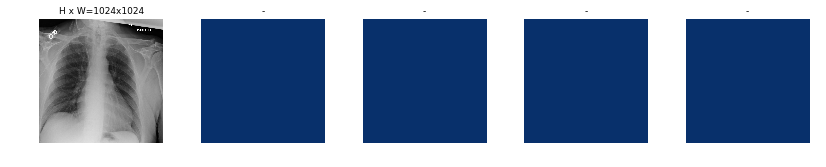

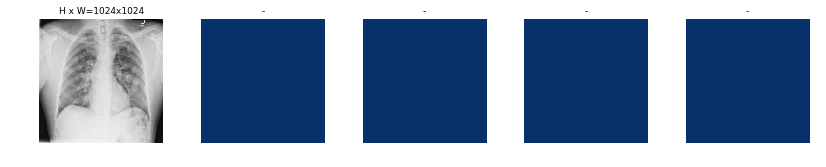

In [46]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  19355 /home/aditya/git/RCNN_Pneumonia/data/stage_1_train_images/b06a0fe5-dd0c-448e-bbbd-b773b17e5537.dcm
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (2, 4)                min:  193.00000  max:  791.00000  int32


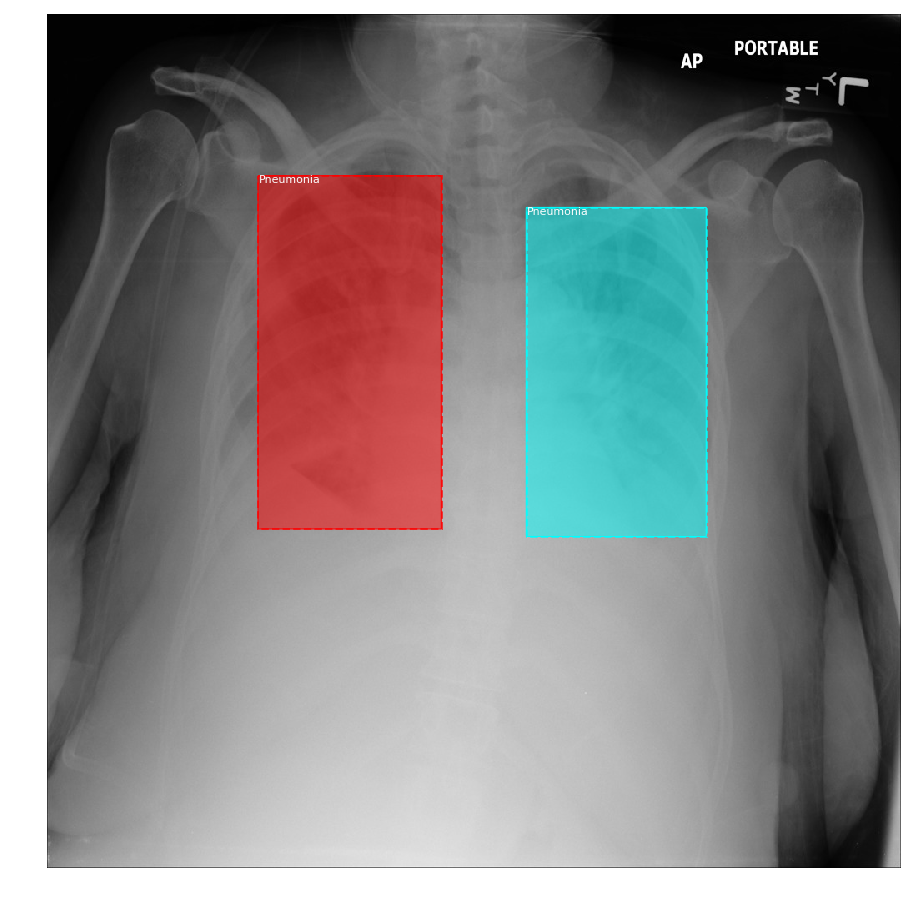

In [54]:
# Load random image and mask.
image_id = 19355
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)